Problem 1:

Part 1: Two-Tailed Test:

A Road surface Prolifer has measured the roughness of a pavement section with mean of 1.779 m/km and the std of 0.071 m/km. Is the true mean IRI different from 1.8 m/km? H₀: μ = 1.8
H₁: μ ≠ 1.8

Part 2: One-Tailed Test (Left-Tailed)

Assume the above results achieved after microsurfacing to improvde roughness. Is the true mean IRI below 1.8 m/km? H₀: μ ≥ 1.8
H₁: μ < 1.8

In [5]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm

# Data
IRI = np.array([1.72, 1.85, 1.68, 1.91, 1.77, 1.69, 1.74, 1.80, 1.88, 1.71,
                1.83, 1.76, 1.70, 1.79, 1.87, 1.73, 1.81, 1.75, 1.78, 1.84,
                1.66, 1.89, 1.82, 1.77, 1.71,1.72, 1.85, 1.68, 1.91, 1.77])
n = len(IRI)
mu0 = 1.8
alpha = 0.05
x_bar = IRI.mean()
s = IRI.std(ddof=1)
se = s / np.sqrt(n)
t_stat = (x_bar - mu0) / se
z_stat =t_stat

# Two-tailed
t_crit_two = t.ppf(1-alpha/2, n-1)
z_crit_two = norm.ppf(1-alpha/2)
ci_lower_two = x_bar - t_crit_two * se
ci_upper_two = x_bar + t_crit_two * se
p_two = 2 * t.cdf(-abs(t_stat), n-1)
p_two_z = 2 * norm.cdf(-abs(z_stat))

# One-tailed (left)
t_crit_one = abs(t.ppf(alpha, n-1))
z_crit_one = abs(norm.ppf(alpha))
ci_lower_one = x_bar - t_crit_one * se
ci_upper_one = x_bar + t_crit_one * se
p_one = t.cdf(t_stat, n-1)
p_one_z = norm.cdf(z_stat)

print("=== TWO-TAILED ===")
print(f"CI: [{ci_lower_two:.3f}, {ci_upper_two:.3f}] → {'Includes' if ci_lower_two <= mu0 <= ci_upper_two else 'Excludes'} 1.8")
print(f"t = {t_stat:.3f}, |t_crit| = ±{t_crit_two:.3f} → {'Reject' if abs(t_stat) > t_crit_two else 'Fail to reject'}")
print(f"p_t = {p_two:.4f} → {'Reject' if p_two < alpha else 'Fail to reject'} H₀")
print(f"z = {z_stat:.3f}, |z_crit| = ±{z_crit_two:.3f} → {'Reject' if abs(z_stat) > z_crit_two else 'Fail to reject'}")
print(f"p_z = {p_two_z:.4f} → {'Reject' if p_two_z < alpha else 'Fail to reject'} H₀\n")

print("=== ONE-TAILED (μ < 1.8) ===")
print(f"CI: [{ci_lower_one:.3f}, {ci_upper_one:.3f}] → {'Includes' if ci_lower_one <= mu0 <= ci_upper_one else 'Excludes'} 1.8")
print(f"t = {t_stat:.3f}, t_crit = {t_crit_one:.3f} → {'Reject' if abs(t_stat) > t_crit_one else 'Fail to reject'}")
print(f"p_t = {p_one:.4f} → {'Reject' if p_one < alpha else 'Fail to reject'} H₀")
print(f"z = {z_stat:.3f}, z_crit = {z_crit_one:.3f} → {'Reject' if abs(z_stat) > z_crit_one else 'Fail to reject'}")
print(f"p_z = {p_one_z:.4f} → {'Reject' if p_one_z < alpha else 'Fail to reject'} H₀")



=== TWO-TAILED ===
CI: [1.752, 1.807] → Includes 1.8
t = -1.526, |t_crit| = ±2.045 → Fail to reject
p_t = 0.1379 → Fail to reject H₀
z = -1.526, |z_crit| = ±1.960 → Fail to reject
p_z = 0.1271 → Fail to reject H₀

=== ONE-TAILED (μ < 1.8) ===
CI: [1.757, 1.802] → Includes 1.8
t = -1.526, t_crit = 1.699 → Fail to reject
p_t = 0.0689 → Fail to reject H₀
z = -1.526, z_crit = 1.645 → Fail to reject
p_z = 0.0635 → Fail to reject H₀


Problem 2:

Two-Sample Unpaired t-Test
Do concrete and asphalt pavements have the same mean skid resistance?
Scenario
Test skid number (SN):

Concrete (n=20): mean = 52.1, s = 4.2
Asphalt (n=22): mean = 48.3, s = 3.8
Test: H₀: μ₁ = μ₂ vs H₁: μ₁ ≠ μ₂, α = 0.05

In [ ]:
from scipy.stats import ttest_ind

# Generated data
np.random.seed(200)
concrete = np.random.normal(52, 4.2, 20)
asphalt = np.random.normal(48, 3.8, 22)

t_stat, p_value = ttest_ind(concrete, asphalt, equal_var=True)

print("Problem 2: Unpaired t-Test")
print(f"Concrete: n={len(concrete)}, mean={concrete.mean():.2f}")
print(f"Asphalt:  n={len(asphalt)}, mean={asphalt.mean():.2f}")
print(f"t = {t_stat:.3f}, p-value = {p_value:.4f}")
print(f"Reject H₀? {'YES' if p_value < 0.05 else 'NO'}")

Problem 2: Unpaired t-Test
Concrete: n=20, mean=53.21
Asphalt:  n=22, mean=48.76
t = 3.516, p-value = 0.0011
Reject H₀? YES


Problem 3:

Paired t-Test
Did a surface treatment improve pavement roughness?
Scenario
IRI measured before and after treatment on n=15 segments:
Before: [2.8, 2.9, 3.1, ...]
After:  [2.1, 2.3, 2.4, ...]
Test: H₀: μ_diff = 0 vs H₁: μ_diff > 0 (improvement), α = 0.05

In [ ]:
from scipy.stats import ttest_rel

# Generated paired data
np.random.seed(300)
before = np.random.normal(3.0, 0.4, 15)
improvement = np.random.normal(0.7, 0.2, 15)
after = before - improvement

t_stat, p_value = ttest_rel(before, after, alternative='greater')

print("Problem 3: Paired t-Test")
print(f"Mean Before = {before.mean():.2f}, Mean After = {after.mean():.2f}")
print(f"Mean Diff = {before.mean() - after.mean():.2f}")
print(f"t = {t_stat:.3f}, p-value = {p_value:.4f}")
print(f"Reject H₀? {'YES' if p_value < 0.05 else 'NO'}")

Problem 3: Paired t-Test
Mean Before = 3.01, Mean After = 2.32
Mean Diff = 0.70
t = 8.986, p-value = 0.0000
Reject H₀? YES


Problem 4:

ANOVA (More than 2 Samples)
Do three pavement types have the same mean PCI?
Scenario
PCI for 3 pavement types (n=18 each):

Type A (Rigid)
Type B (Flexible)
Type C (Composite)
Test: H₀: μ₁ = μ₂ = μ₃ vs H₁: At least one differs, α = 0.05

Problem 4: ANOVA
Type A: mean = 86.0
Type B: mean = 79.1
Type C: mean = 84.2
F = 9.060, p-value = 0.0004
Reject H₀? YES


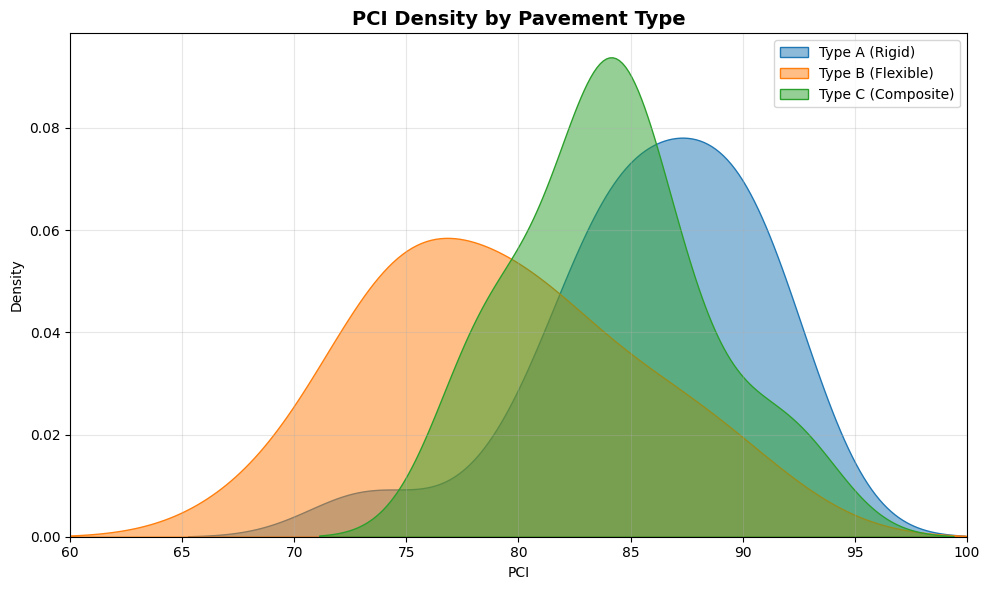

=== Manual Pairwise t-tests (α = 0.05) ===
Pair         t-stat    p-value Decision
---------------------------------------------
A vs B        3.821     0.0006  REJECT H₀
A vs C        1.226     0.2286  Fail to reject
B vs C       -2.945     0.0062  REJECT H₀
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
Type A Type B  -6.8436 0.0004 -10.864 -2.8233   True
Type A Type C  -1.8197  0.523   -5.84  2.2007  False
Type B Type C    5.024 0.0109  1.0036  9.0443   True
----------------------------------------------------


In [13]:
import numpy as np
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ttest_ind
import pandas as pd

# Generated data
np.random.seed(400)
type_A = np.random.normal(85, 5, 18)
type_B = np.random.normal(78, 6, 18)
type_C = np.random.normal(82, 5, 18)

f_stat, p_value = f_oneway(type_A, type_B, type_C)

print("Problem 4: ANOVA")
print(f"Type A: mean = {type_A.mean():.1f}")
print(f"Type B: mean = {type_B.mean():.1f}")
print(f"Type C: mean = {type_C.mean():.1f}")
print(f"F = {f_stat:.3f}, p-value = {p_value:.4f}")
print(f"Reject H₀? {'YES' if p_value < 0.05 else 'NO'}")

plt.figure(figsize=(10, 6))
for label, values in [('Type A (Rigid)', type_A),
                      ('Type B (Flexible)', type_B),
                      ('Type C (Composite)', type_C)]:
    sns.kdeplot(values, label=label, fill=True, alpha=0.5)

plt.title('PCI Density by Pavement Type', fontsize=14, fontweight='bold')
plt.xlabel('PCI')
plt.ylabel('Density')
plt.legend()
plt.xlim(60, 100)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# ===================================================================
# 3. Manual Pairwise t-tests
# ===================================================================
pairs = [
    ('A vs B', type_A, type_B),
    ('A vs C', type_A, type_C),
    ('B vs C', type_B, type_C)
]

print("=== Manual Pairwise t-tests (α = 0.05) ===")
print(f"{'Pair':<10} {'t-stat':>8} {'p-value':>10} {'Decision'}")
print("-" * 45)

for label, g1, g2 in pairs:
    t_stat, p_val = ttest_ind(g1, g2, equal_var=False)  # Welch's t-test
    reject = p_val < 0.05
    decision = "REJECT H₀" if reject else "Fail to reject"
    print(f"{label:<10} {t_stat:>8.3f} {p_val:>10.4f}  {decision}")

# ===================================================================
# 4. Post-Hoc: Which Pairs Differ? (Tukey's HSD)
# ===================================================================
# Need to combine data for Tukey's HSD
data = pd.DataFrame({
    'PCI': np.concatenate([type_A, type_B, type_C]),
    'Type': ['Type A'] * len(type_A) + ['Type B'] * len(type_B) + ['Type C'] * len(type_C)
})
tukey = pairwise_tukeyhsd(endog=data['PCI'], groups=data['Type'], alpha=0.05)
print(tukey)

